<a href="https://colab.research.google.com/github/samiha-mahin/A_Deep_Learning_Repo/blob/main/DAN_DCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DAN (Deep Attention Network)**

## 🌟 What is a **DAN (Deep Attention Network)?**

A **DAN** is a neural network that uses **attention mechanisms** to automatically **weigh and prioritize features or interactions**. It is **especially useful for structured/tabular data** (like user clicks, e-commerce, medical data) where not all features contribute equally.

---

## 🧠 **Core Idea of DAN**

Instead of treating all input features equally, **DAN assigns different weights to features or feature pairs**, helping the model "pay attention" to the most relevant parts of the input.

---

## 📐 Example: E-commerce User Click Prediction (DIN Model)

Let’s say you want to predict whether a user will click on a product. You have:

* User features: age, gender, location
* Product features: category, price, brand
* User behavior history: list of past clicked items

### 🔍 In DAN:

* The model uses **attention** to decide **which past clicked items** are most relevant to the current product.
* If the user previously clicked many electronics, attention will **assign more weight to those** while comparing with a new electronics item.

---

## 🏗️ Architecture (Example: **DIN – Deep Interest Network**)

```
Input (user, product, history)
      |
Embedding Layers (for sparse features)
      |
Attention Layer (over user history, conditioned on current item)
      |
Weighted Summation (outputs interest vector)
      |
MLP Layers (dense)
      |
Output (probability of click)
```

🧠 The **attention layer** computes weights like:

```math
αᵢ = softmax(Attention(query=current_item, key=history_itemᵢ))
```

This gives us a **customized interest representation** per input.

---

## ✅ Common **DAN-Based Models**

| Model                     | Name                                                                 | Description                                                                      |
| ------------------------- | -------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| **DIN**                   | Deep Interest Network                                                | First popular DAN for CTR prediction; uses attention on user behavior.           |
| **DIEN**                  | Deep Interest Evolution Network                                      | Adds time sequence modeling (GRU + attention) to DIN.                            |
| **AutoInt**               | Automatic Feature Interaction Learning                               | Uses multi-head self-attention to model feature interactions like a Transformer. |
| **FiBiNET**               | Feature Interaction Bilinear Network                                 | Combines **bilinear pooling** and **SE-attention** (Squeeze-Excitation).         |
| **AFN**                   | Adaptive Factorization Network                                       | Uses attention to combine low-order and high-order features.                     |
| **DeepFM with Attention** | Extension of DeepFM with an attention layer over feature embeddings. |                                                                                  |

---

## 📊 When to Use DAN?

Use DAN when:

* You have **tabular or sparse data** with many features (e.g., recommender systems, medical diagnosis, insurance).
* You want to model **interactions** between features **automatically**.
* You need **interpretability** — attention weights can show what the model focused on.

---

## 🔧 Example in Code (Simplified TensorFlow-like)

```python
# Example: attention over item history (simplified)
def attention(query, keys):
    scores = tf.matmul(query, keys, transpose_b=True)  # [batch, 1, seq]
    weights = tf.nn.softmax(scores)
    output = tf.matmul(weights, keys)  # weighted sum
    return output
```

---

## 🧠 Summary: DAN vs Others

| Feature                   | DAN                    | DCN              | DNN              |
| ------------------------- | ---------------------- | ---------------- | ---------------- |
| Attention Layer           | ✅ Yes                  | ❌ No             | ❌ No             |
| Learns Feature Importance | ✅ Yes                  | ⚠️ Implicit      | ❌ No             |
| Feature Interaction       | ✅ High-order (dynamic) | ✅ Explicit Cross | ⚠️ Implicit only |

---




#**DCN (Deep & Cross Network)**

### ❓ What is **DCN (Deep & Cross Network)?**

**DCN** stands for **Deep & Cross Network**. It is a hybrid neural network architecture that models both:

* **Explicit low-degree feature interactions** using a **Cross Network**
* **Nonlinear high-order interactions** using a **Deep Neural Network (DNN)**

---

### 💡 Why DCN?

* **Linear models** (e.g., logistic regression) only capture **simple relationships**.
* **Deep neural networks (DNNs)** capture **complex, nonlinear patterns**, but they **do not explicitly** model low-order feature interactions.
* **Feature crosses** like `age × device_type` are important in many real-world applications (e.g., recommendation systems, ads).

> **DCN solves this by combining a cross network with a deep network.**

---

### 🧠 **Architecture of DCN**

#### 1. **Cross Network** (Explicit Feature Interactions)

* Learns **explicit cross terms** like `x_i * x_j`.
* Each layer is computed as:

  $$
  \mathbf{x}_{l+1} = \mathbf{x}_0 \cdot (\mathbf{w}_l^\top \mathbf{x}_l) + \mathbf{b}_l + \mathbf{x}_l
  $$

  * $\mathbf{x}_0$: original input
  * $\mathbf{x}_l$: input to layer `l`
  * $\mathbf{w}_l$: learnable weights
  * $\mathbf{b}_l$: bias

#### 2. **Deep Network** (Nonlinear High-Order Interactions)

* Standard **fully connected MLP** with ReLU or GELU activations.
* Learns **nonlinear combinations** of features.

#### 3. **Concatenation and Output Layer**

* Final representation:

  $$
  \text{concat}(\text{Cross Output}, \text{Deep Output})
  \rightarrow \text{Final Prediction}
  $$

---

### 🎯 Why Is This Useful?

* **Captures both** low-order and high-order interactions
* **No need for manual feature crosses**
* Ideal for **tabular data**: recommendation systems, CTR prediction, clinical diagnosis, insurance modeling

---

### 🧪 Example Use Case: Ad Click Prediction

**Features:**

* User Age
* Gender
* Ad Category
* Device Type

| Component     | Learns                                                                                        |
| ------------- | --------------------------------------------------------------------------------------------- |
| Cross Network | Explicit features like: Age × Ad Category, Gender × Device                                    |
| Deep Network  | Complex patterns across all features (e.g., high Age & specific Category with mobile devices) |

---

### ✅ Summary

| Aspect            | Explanation                                       |
| ----------------- | ------------------------------------------------- |
| **Model Name**    | **DCN – Deep & Cross Network**                    |
| **Cross Network** | Models explicit low-degree feature crosses        |
| **Deep Network**  | Models nonlinear, high-order interactions         |
| **Output**        | Concatenated result for final prediction          |
| **Use Cases**     | CTR prediction, recommender systems, medical data |

---



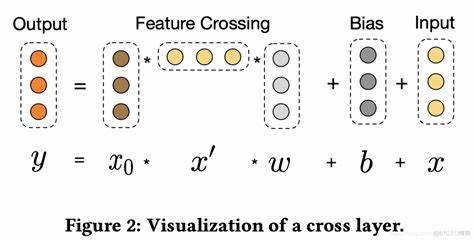

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class CrossLayer(layers.Layer):
    def __init__(self, input_dim):
        super().__init__()
        self.w = self.add_weight(shape=(input_dim,), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(input_dim,), initializer='zeros', trainable=True)

    def call(self, x0, x):
        xw = tf.reduce_sum(x * self.w, axis=1, keepdims=True)
        return x0 * xw + self.b + x

class DeepCrossNetwork(Model):
    def __init__(self, input_dim):
        super().__init__()
        self.cross1 = CrossLayer(input_dim)
        self.cross2 = CrossLayer(input_dim)
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x0 = inputs
        x = self.cross1(x0, x0)
        x = self.cross2(x0, x)
        deep_out = self.dense1(x0)
        deep_out = self.dense2(deep_out)
        combined = tf.concat([x, deep_out], axis=1)
        return self.output_layer(combined)

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# Load Titanic data (example)
df = pd.read_csv('titanic.csv')

# Preprocessing (simple example)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna('S', inplace=True)

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived'].values

# Encode categorical variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])

# Scale numerical features
scaler = StandardScaler()
for col in ['Age', 'Fare']:
    X[col] = scaler.fit_transform(X[[col]])

X = X.values.astype(np.float32)

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define your DAN model (as shared earlier)...

input_dim = X_train.shape[1]
model = DeepCrossNetwork(input_dim=input_dim)

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32)

# Predict and evaluate
y_pred = (model.predict(X_valid) > 0.5).astype(int)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))

Epoch 1/50


/tmp/ipython-input-5-1452745367.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-5-1452745367.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5895 - loss: 0.6977 - val_accuracy: 0.6369 - val_loss: 0.6023
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7134 - loss: 0.5350 - val_accuracy: 0.7374 - val_loss: 0.5431
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7811 - loss: 0.4926 - val_accuracy: 0.7598 - val_loss: 0.5016
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7907 - loss: 0.4799 - val_accuracy: 0.7709 - val_loss: 0.4830
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.4532 - val_accuracy: 0.7933 - val_loss: 0.4667
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8160 - loss: 0.4237 - val_accuracy: 0.7933 - val_loss: 0.4627
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8086 - loss: 0.4190 - val_accuracy: 0.7989 - val_loss: 0.4589
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7983 - loss: 0.4434 - val_accuracy: 0.8045 - val_loss: 0.4533
Ep